## Food Distribution at Islamic Family Project

Islamic Family distributes food hampers to the people in need, but it is hard for them to
know that which clients will come back to them. As they don’t know who will come back
that’s why they can’t plan resources properly and it leads to the food wastage and missed
chances to help those at risk of not returning.

This problem is worth solving as it identifies

1.) Clients who will not return so that they can be supported.

2.) It ensures there is less wastage of food and better distribution.

3.) It keeps record that food hampers are available to those people who need it.

4.)
It helps the organization to plan things and services in proper way.

The business values hypothesis is that data-driven predictions will enable better planning,
reduced operational costs, and improved service accessibility. The beneficiaries include
Islamic Family staff, volunteers, and community partners who work to improve food
security and long-term support for clients.

**The model addresses unpredictable client return rates, improving efficiency and accessibility.**

This project builds a classification model to predict
Client retention -

1.   Client Interactions – Appointment contact, scheduling, pickup history.
2.   Food Hamper Details – Type, confirmation status, quantity
3.   Engagement Data – Event participation, outreach response  
4.   Historical Trends – Frequency of past visits.

Potential ML Models: The model’s accuracy could be calculated by comparing actual vs predicted client returns

F1-score ensures high recall and precision, preventing missed outreach
opportunities due to imbalanced data.


# Exploratory Data Analysis

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Reading the csv files
client_data = pd.read_csv('Clients Data Dimension(Clients_IFSSA).csv')
foodhamper_data = pd.read_csv('Food Hampers Fact(FoodHampers_IFSSA).csv')

<ipython-input-2-f76ad6f33d73>:2: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  client_data = pd.read_csv('Clients Data Dimension(Clients_IFSSA).csv')
<ipython-input-2-f76ad6f33d73>:3: DtypeWarning: Columns (11,30) have mixed types. Specify dtype option on import or set low_memory=False.
  foodhamper_data = pd.read_csv('Food Hampers Fact(FoodHampers_IFSSA).csv')


In [ ]:
client_data.head()

,address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,...,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,1659409273747x473742471276596300,NaN,2022-09-23 19:07,2024-08-22 11:56,pod-001,1658438468381x917903915060866600,1663970867191x215057012520910850
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,NaN,NaN,2022-09-23 19:09,2024-08-22 11:50,2,1658438468381x917903915060866600,1663970977536x320239406776320000
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,1667329109038x317932150591159600,NaN,2022-11-01 15:27,2024-08-22 12:36,pod-023,1658438468381x917903915060866600,1667327243288x887165737992192000
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,NaN,NaN,2022-11-07 12:12,2024-08-22 11:58,pod-024,1667329109038x317932150591159600,1667833948363x769349711194751000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-04 17:20,...,Active,1696450812192x367068913511604100,no,NaN,NaN,2022-11-07 12:17,2024-08-22 12:04,pod-025,1667329109038x317932150591159600,1667834247644x935054501347328000


In [ ]:
client_data.shape

(25505, 44)

In [ ]:
foodhamper_data.head()

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,...,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Jul 27, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484251501x480105574053396160
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Aug 26, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484266053x272870528999898500
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Sep 25, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484268062x404921931938873500
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Oct 25, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484269673x683706627103465300
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Nov 24, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484271378x480307445517271800


In [ ]:
foodhamper_data.shape

(16605, 39)

In [ ]:
# Displaying the basic information of the data
print(client_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   address                           7264 non-null   object 
 1   address_complement                494 non-null    object 
 2   address_text                      6375 non-null   object 
 3   age                               25082 non-null  float64
 4   bio                               5 non-null      object 
 5   birthdates                        25088 non-null  object 
 6   client_status_more_info           59 non-null     object 
 7   communication_barrier             1 non-null      object 
 8   contact_frequency                 202 non-null    object 
 9   date_reopened                     13135 non-null  object 
 10  dependents_qty                    20591 non-null  float64
 11  emergency_contact_name            0 non-null      float64
 12  emer

In [ ]:
# displaying the basic information of data
print(foodhamper_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   agent_collect             7025 non-null   object 
 1   agent_collect_note        5566 non-null   object 
 2   agent_related             16605 non-null  object 
 3   appointment_contact       0 non-null      float64
 4   appointment_participants  12313 non-null  object 
 5   appointment_type          16605 non-null  object 
 6   cal_color                 7025 non-null   object 
 7   client_collected          8957 non-null   object 
 8   client_list               16486 non-null  object 
 9   collect_scheduled_date    16602 non-null  object 
 10  collect_token             16605 non-null  object 
 11  confirmed                 2915 non-null   object 
 12  contact_method            16605 non-null  object 
 13  datetime_from             16604 non-null  object 
 14  dateti

In [ ]:
# Identifying the missing values
print(client_data.isnull().sum())

address                             18241
address_complement                  25011
address_text                        19130
age                                   423
bio                                 25500
birthdates                            417
client_status_more_info             25446
communication_barrier               25504
contact_frequency                   25303
date_reopened                       12370
dependents_qty                       4914
emergency_contact_name              25505
emergency_phone_number              25505
english_proficiency_level           25484
external_id                          1193
family                                 63
household                           11716
id_xano                             25474
latest_contact_method               24972
latest_language_code                24978
organization                            0
organization_signature              25505
pets                                25505
picture                           

In [ ]:
# Checking for the missing values
print(foodhamper_data.isnull().sum())

agent_collect                9580
agent_collect_note          11039
agent_related                   0
appointment_contact         16605
appointment_participants     4292
appointment_type                0
cal_color                    9580
client_collected             7648
client_list                   119
collect_scheduled_date          3
collect_token                   0
confirmed                   13690
contact_method                  0
datetime_from                   1
datetime_to                     6
details                     14337
g_event_id                  16605
g_event_link                16605
hamper_confirmation_type     9580
hamper_type                     0
id_xano                     13700
marked_off                      0
meeting_link                16605
organization                    0
pickup_date                  9580
pickup_location                 0
qrcode                         25
quantity                        0
related_scheduler               5
staff_invited 

In [ ]:
#checking for the duplicate values
print(client_data.duplicated().sum())
print(foodhamper_data.duplicated().sum())

0
0


In [ ]:
client_data.describe()

,age,dependents_qty,emergency_contact_name,emergency_phone_number,id_xano,organization_signature,pets,preferred_contact_method-old-old,primary_client_key
count,25082.000000,20591.000000,0.0,0.0,3.100000e+01,0.0,0.0,0.0,17870.000000
mean,26.771031,4.737507,NaN,NaN,8.788638e+13,NaN,NaN,NaN,3325.388416
std,17.535251,2.393636,NaN,NaN,2.799543e+13,NaN,NaN,NaN,2147.395207
min,-76.000000,0.000000,NaN,NaN,6.712890e+11,NaN,NaN,NaN,1.000000
25%,12.000000,3.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,1408.250000
50%,22.000000,5.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,2889.000000
75%,40.000000,6.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,5290.000000
max,123.000000,18.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,7026.000000


In [ ]:
foodhamper_data.describe()

,appointment_contact,g_event_id,g_event_link,id_xano,meeting_link,quantity,staff_invited,where,Slug
count,0.0,0.0,0.0,2.905000e+03,0.0,16605.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,9.942010e+13,NaN,1.000120,NaN,NaN,NaN
std,NaN,NaN,NaN,6.131533e+12,NaN,0.010974,NaN,NaN,NaN
min,NaN,NaN,NaN,3.646760e+12,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,9.999010e+13,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,9.999010e+13,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,9.999010e+13,NaN,1.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,9.999010e+13,NaN,2.000000,NaN,NaN,NaN


# Handling missing values
Dropping the columns that contain only null values or are blank. We also drop the columns that contain very less information or contain only one values like for organization we don't have any missing values but all the cells contain one organization name.

In [ ]:
# Dropping the columns with very less data
# Get the list of columns in the dataframe
existing_columns = client_data.columns

# Create a list of columns to drop, ensuring they exist in the dataframe
columns_to_drop = [col for col in ['worker','address_complement','preferred_contact_methods','primary_birthdate','address_text', 'bio', 'client_status_more_info','communication_barrier', 'emergency_contact_name','emergency_phone_number', 'english_proficiency_level','organization_signature','picture','id_xano','status_update','preferred_contact_method-old-old','pets','referral_organizations_allowed','organization', 'sex','urgent_goal','zz_address_txt','latest_contact_method','latest_language_code',] if col in existing_columns]

# Drop the columns
client_data = client_data.drop(columns=columns_to_drop)

Converting the data types.

In [ ]:
# Converting the datatypes
client_data['birthdates'] = pd.to_datetime(client_data['birthdates'], format='mixed', errors='coerce')
client_data['date_reopened'] = pd.to_datetime(client_data['date_reopened'], errors='coerce')
client_data['Creation Date'] = pd.to_datetime(client_data['Creation Date'], errors='coerce')
client_data['Modified Date'] = pd.to_datetime(client_data['Modified Date'], errors='coerce')
client_data['contact_frequency'] = client_data['contact_frequency'].astype('category')
client_data['household'] = client_data['household'].astype('category')
client_data['podio_created_on'] = pd.to_datetime(client_data['podio_created_on'], errors='coerce')
client_data['preferred_languages'] = client_data['preferred_languages'].astype('category')
client_data['sex_new'] = client_data['sex_new'].astype('category')
client_data['status'] = client_data['status'].astype('category')


As we have more values for birthdates than age so for the missing values we get age from the birthdates.

In [ ]:
# Create a mask for missing 'age' and non-missing 'birthdates'
mask = client_data['age'].isnull() & client_data['birthdates'].notnull()

# Calculate age based on 'Modified Date'
client_data.loc[mask, 'age'] = (client_data.loc[mask, 'Modified Date'] - client_data.loc[mask, 'birthdates']).dt.days // 365

In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   address              7264 non-null   object        
 1   age                  25090 non-null  float64       
 2   birthdates           25077 non-null  datetime64[ns]
 3   contact_frequency    202 non-null    category      
 4   date_reopened        13135 non-null  datetime64[ns]
 5   dependents_qty       20591 non-null  float64       
 6   external_id          24312 non-null  object        
 7   family               25442 non-null  object        
 8   household            13789 non-null  category      
 9   podio_created_on     23240 non-null  datetime64[ns]
 10  preferred_languages  5120 non-null   category      
 11  primary_client_key   17870 non-null  float64       
 12  primary_contact      24047 non-null  object        
 13  sex_new              24508 non-

In [ ]:
existingcolumns = foodhamper_data.columns
columns_to_drop = [col for col in ['agent_collect','id_xano','qrcode','appointment_contact','agent_collect_note','cal_color', 'contact_method', 'appointment_type','g_event_id','g_event_link','meeting_link','marked_off','organization','staff_invited','timezone','where','Slug']]
foodhamper_data = foodhamper_data.drop(columns=columns_to_drop)

In [ ]:
foodhamper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   agent_related             16605 non-null  object
 1   appointment_participants  12313 non-null  object
 2   client_collected          8957 non-null   object
 3   client_list               16486 non-null  object
 4   collect_scheduled_date    16602 non-null  object
 5   collect_token             16605 non-null  object
 6   confirmed                 2915 non-null   object
 7   datetime_from             16604 non-null  object
 8   datetime_to               16599 non-null  object
 9   details                   2268 non-null   object
 10  hamper_confirmation_type  7025 non-null   object
 11  hamper_type               16605 non-null  object
 12  pickup_date               7025 non-null   object
 13  pickup_location           16605 non-null  object
 14  quantity              

In [ ]:
foodhamper_data['Creation Date'] = pd.to_datetime(foodhamper_data['Creation Date'], errors='coerce')
foodhamper_data['Modified Date'] = pd.to_datetime(foodhamper_data['Modified Date'], errors='coerce')
foodhamper_data['collect_scheduled_date'] = pd.to_datetime(foodhamper_data['collect_scheduled_date'], errors='coerce')
foodhamper_data['datetime_from'] = pd.to_datetime(foodhamper_data['datetime_from'], errors='coerce')
foodhamper_data['datetime_to'] = pd.to_datetime(foodhamper_data['datetime_to'], errors='coerce')
foodhamper_data['confirmed'] = foodhamper_data['confirmed'].astype('category')
foodhamper_data['hamper_confirmation_type'] = foodhamper_data['hamper_confirmation_type'].astype('category')
foodhamper_data['pickup_date'] = pd.to_datetime(foodhamper_data['pickup_date'], errors='coerce')
foodhamper_data['title'] = foodhamper_data['title'].astype('category')
foodhamper_data['hamper_type'] = foodhamper_data['hamper_type'].astype('category')



In [ ]:
foodhamper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   agent_related             16605 non-null  object        
 1   appointment_participants  12313 non-null  object        
 2   client_collected          8957 non-null   object        
 3   client_list               16486 non-null  object        
 4   collect_scheduled_date    16602 non-null  datetime64[ns]
 5   collect_token             16605 non-null  object        
 6   confirmed                 2915 non-null   category      
 7   datetime_from             16604 non-null  datetime64[ns]
 8   datetime_to               16599 non-null  datetime64[ns]
 9   details                   2268 non-null   object        
 10  hamper_confirmation_type  7025 non-null   category      
 11  hamper_type               16605 non-null  category      
 12  pickup_date       

In [ ]:
# check if datetime_from and datetime_to are identical
identical_dates = (foodhamper_data['datetime_from'] == foodhamper_data['datetime_to'])

# count the number of identical and non-identical rows
identical_count = identical_dates.sum()
non_identical_count = len(foodhamper_data) - identical_count

print(f"Number of identical rows: {identical_count}")

Number of identical rows: 16599


In [ ]:
# remove datetime_to column
foodhamper_data = foodhamper_data.drop(columns=['datetime_to'])

# Merging the data

Merging the datasets on unique_id of food hamper dataset and do the left merge on the client dataframe because we need the data for all the clients in foodhamper data.

In [ ]:
#merging the datasets on unique_id and do the left merge od dataframe
merged_data = pd.merge(foodhamper_data,client_data, left_on='unique_client', right_on='unique id', how='left')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   agent_related             16605 non-null  object        
 1   appointment_participants  12313 non-null  object        
 2   client_collected          8957 non-null   object        
 3   client_list               16486 non-null  object        
 4   collect_scheduled_date    16602 non-null  datetime64[ns]
 5   collect_token             16605 non-null  object        
 6   confirmed                 2915 non-null   category      
 7   datetime_from             16604 non-null  datetime64[ns]
 8   details                   2268 non-null   object        
 9   hamper_confirmation_type  7025 non-null   category      
 10  hamper_type               16605 non-null  category      
 11  pickup_date               7025 non-null   datetime64[ns]
 12  pickup_location   

In [ ]:
# checking if the creation data and modified date are same from both datasets
creation_date_match = (merged_data["Creation Date_x"] == merged_data["Modified Date_x"])
modified_date_match = (merged_data["Creation Date_y"] == merged_data["Modified Date_y"])

print(f"Matching Creation Dates: {creation_date_match.sum()} / {len(merged_data)}")
print(f"Matching Modified Dates: {modified_date_match.sum()} / {len(merged_data)}")


Matching Creation Dates: 1603 / 16605
Matching Modified Dates: 0 / 16605


In [ ]:
# checking for duplicates in unique_id
duplicate_count = merged_data['unique_client'].duplicated().sum()
duplicate_count_1 = merged_data['unique id_x'].duplicated().sum()
duplicate_count_2 = merged_data['unique id_y'].duplicated().sum()
print(f"Number of duplicate unique_id: {duplicate_count}")
print(f"Number of duplicate unique id_x: {duplicate_count_1}")
print(f"Number of duplicate unique id_y: {duplicate_count_2}")


Number of duplicate unique_id: 15553
Number of duplicate unique id_x: 0
Number of duplicate unique id_y: 15553


In [ ]:
# checking for duplicates
duplicate_count = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# deleting the unimportant columns
# merged_data = merged_data.drop(columns=['unique id_y','Creation Date_y','Modified Date_y', 'Creation Date_x','Modified Date_x'])

In [ ]:
merged_data = merged_data.rename(columns={'unique id_x': 'unique id'})

In [ ]:
# comparing the data in creator_x and creator_y to see if the data is same in these columns
creator_match = (merged_data["Creator_x"] == merged_data["Creator_y"])
print(f"Matching Creator Values: {creator_match.sum()} / {len(merged_data)}")

Matching Creator Values: 1451 / 16605


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   agent_related             16605 non-null  object        
 1   appointment_participants  12313 non-null  object        
 2   client_collected          8957 non-null   object        
 3   client_list               16486 non-null  object        
 4   collect_scheduled_date    16602 non-null  datetime64[ns]
 5   collect_token             16605 non-null  object        
 6   confirmed                 2915 non-null   category      
 7   datetime_from             16604 non-null  datetime64[ns]
 8   details                   2268 non-null   object        
 9   hamper_confirmation_type  7025 non-null   category      
 10  hamper_type               16605 non-null  category      
 11  pickup_date               7025 non-null   datetime64[ns]
 12  pickup_location   

We drop the columns that are no longer needed which means that for our predictions we don't need them.

In [ ]:
# drop column not necessary
merged_data = merged_data.drop(columns=['appointment_participants','client_collected','client_list','details','hamper_type','Creator_x','Creator_y','podio_created_on','unique id_y','Slug'])

In [ ]:
# print unique from sex column
print(merged_data['sex_new'].unique())

[NaN, 'Female', 'Male', ' Female']
Categories (5, object): [' Female', 'Female', 'Male', 'Other Sexual and/or Gender Identity',
                         'Transgender']


To have more clear observations about the gender we only keep three gender that are male female and undefined that is if the gender is unknown or they belong to any other gender they are labelled as undefined.

In [ ]:
# Convert to string and clean spaces
merged_data['sex_new'] = merged_data['sex_new'].astype(str).str.strip()

# Print unique values before mapping
print("Before Mapping - Unique Values in 'sex_new':")
print(merged_data['sex_new'].unique())

# Standardizing gender labels
gender_mapping = {
    ' Female': 'Female',  # Fix spacing issue
    'Other Sexual and/or Gender Identity': 'Undefined',
    'Transgender': 'Undefined',
}

# Apply mapping
merged_data['sex_new'] = merged_data['sex_new'].replace(gender_mapping)

# Convert to categorical with forced 4 categories
merged_data['sex_new'] = pd.Categorical(
    merged_data['sex_new'],
    categories=['Female', 'Male', 'Undefined']
)

# Ensure NaN values are properly assigned to "Undefined"
merged_data.loc[merged_data['sex_new'].isna(), 'sex_new'] = 'Undefined'

# Rename column
merged_data.rename(columns={'sex_new': 'Sex'}, inplace=True)

# Print updated unique values
print("\nAfter Mapping - Unique Values in 'Sex' column:")
print(merged_data['Sex'].value_counts(dropna=False))


Before Mapping - Unique Values in 'sex_new':
['nan' 'Female' 'Male']

After Mapping - Unique Values in 'Sex' column:
Sex
Male         7715
Female       7277
Undefined    1613
Name: count, dtype: int64


For the status column we have some of the unused categories which we change remove and keep only the columns that are used and update the count to avoid any misleading observations.

In [ ]:
# print status column unique
print(merged_data['status'].unique())

[NaN, 'Active', 'Closed', 'Pending', 'Outreach', 'Flagged']
Categories (8, object): ['Active', 'Closed', 'Does not Qualify', 'Draft', 'Flagged', 'Outreach',
                         'Pending', 'Suspended']


In [ ]:
# Get all unique values that are present in the dataset
actual_values = merged_data['status'].unique()

# Get all predefined categories
all_categories = merged_data['status'].dtype.categories

# Find missing categories
missing_categories = set(all_categories) - set(actual_values)

print(f"Categories in dtype but missing in actual data: {missing_categories}")


Categories in dtype but missing in actual data: {'Draft', 'Does not Qualify', 'Suspended'}


In [ ]:
# Ensure the column exists and is categorical before modifying
if 'status' in merged_data.columns and pd.api.types.is_categorical_dtype(merged_data['status']):
    # Remove unused categories
    merged_data['status'] = merged_data['status'].cat.remove_unused_categories()

    # Count values including NaN
    status_counts = merged_data['status'].value_counts(dropna=False)  # Keeping NaN in count

    # Print updated count including NaN
    print("Updated 'status' column value counts (including NaN):")
    print(status_counts)
else:
    print("Column 'status' does not exist or is not categorical in merged_data.")


Updated 'status' column value counts (including NaN):
status
Active      15620
Closed        610
Pending       211
NaN           119
Outreach       31
Flagged        14
Name: count, dtype: int64


<ipython-input-38-0a635291a1c9>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if 'status' in merged_data.columns and pd.api.types.is_categorical_dtype(merged_data['status']):


In [ ]:
merged_data.head(5)

,agent_related,collect_scheduled_date,collect_token,confirmed,datetime_from,hamper_confirmation_type,pickup_date,pickup_location,quantity,related_scheduler,...,external_id,family,household,preferred_languages,primary_client_key,primary_contact,Sex,status,Creation Date_y,Modified Date_y
0,1689771309517x402134288376915900,2023-07-27,9CHJ75,NaN,2023-07-27,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,NaN,NaT,NaT
1,1689771309517x402134288376915900,2023-08-26,1VYMC5,NaN,2023-08-26,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,NaN,NaT,NaT
2,1689771309517x402134288376915900,2023-09-25,QHWDXG,NaN,2023-09-25,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,NaN,NaT,NaT
3,1689771309517x402134288376915900,2023-10-25,6SAN43,NaN,2023-10-25,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,NaN,NaT,NaT
4,1689771309517x402134288376915900,2023-11-24,TMXAOB,NaN,2023-11-24,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,NaN,NaT,NaT


In [ ]:
merged_data.shape

(16605, 31)

In [ ]:
for col in merged_data.columns:
    print(f"{col}: {merged_data[col].nunique()} unique values, {merged_data[col].isnull().sum()} missing values")


agent_related: 16 unique values, 0 missing values
collect_scheduled_date: 796 unique values, 3 missing values
collect_token: 13786 unique values, 0 missing values
confirmed: 2 unique values, 13690 missing values
datetime_from: 799 unique values, 1 missing values
hamper_confirmation_type: 4 unique values, 9580 missing values
pickup_date: 5733 unique values, 9580 missing values
pickup_location: 1 unique values, 0 missing values
quantity: 2 unique values, 0 missing values
related_scheduler: 2050 unique values, 5 missing values
title: 86 unique values, 0 missing values
unique_client: 1051 unique values, 119 missing values
Creation Date_x: 2477 unique values, 0 missing values
Modified Date_x: 4203 unique values, 0 missing values
unique id: 16605 unique values, 0 missing values
address: 950 unique values, 804 missing values
age: 76 unique values, 563 missing values
birthdates: 840 unique values, 582 missing values
contact_frequency: 2 unique values, 13984 missing values
date_reopened: 272 un

In [ ]:
# group by family
family_data = merged_data.groupby(['family'])

To handle the missing values for birthdates we convert the missing values to -1 which stands for unknown. We convert it to -1 instead of unknown so that we can convert the datatype to integer

In [ ]:
#Drop birthdates
merged_data = merged_data.drop(columns=['birthdates'])

In [ ]:
# checking the unique values for age
unique_values = merged_data['age'].unique()
print(unique_values)

[nan 36. 32. 30. 40. 28. 45. 35. 41. 49. 22. 38. 54. 21. 72. 26. 37. 42.
 34. 39. 31. 57. 63. 66. 51. 50. 43. 46. 33. 69. 82. 55. 78. 48. 56. 59.
 44. 74. 70. 60. 52. 65. 24. 47. 61. 53. 25. 77. 84. 20. 75.  0. 68. 58.
 29. 27. 64. 71. 83. 67. 17. 18. 76. 23. 62. 80. 11. 13.  3.  2. 14. 10.
 86.  7. 16.  1.  4.]


We create the bins for the age column to look at specific age group as there are alot of unique values for the age we can bin them look which age group is receiving most of the hampers and which age group is more likely to come back.

In [ ]:

# Ensure 'age' has no infinite values
merged_data['age'] = merged_data['age'].replace([np.inf, -np.inf], np.nan)

# Define Age Groups
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '19-35', '36-60', '60+']

# Create 'age_group' column
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Fill NaN values with 'Undefined'
merged_data['age_group'] = merged_data['age_group'].cat.add_categories(['Undefined'])  # Ensure 'Undefined' is a category
merged_data['age_group'].fillna('Undefined', inplace=True)  # Replace NaN with 'Undefined'

# Verify Results
print("✅ Unique values in 'age_group':", merged_data['age_group'].unique())
print("✅ Count per Age Group:")
print(merged_data['age_group'].value_counts())


✅ Unique values in 'age_group': ['Undefined', '36-60', '19-35', '60+', '0-18']
Categories (5, object): ['0-18' < '19-35' < '36-60' < '60+' < 'Undefined']
✅ Count per Age Group:
age_group
36-60        10581
19-35         3635
60+           1699
Undefined      563
0-18           127
Name: count, dtype: int64


<ipython-input-45-68288688f32c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['age_group'].fillna('Undefined', inplace=True)  # Replace NaN with 'Undefined'


In [ ]:
# Check unique values in 'age_group'
print("Unique values in 'age_group':", merged_data['age_group'].unique())


Unique values in 'age_group': ['Undefined', '36-60', '19-35', '60+', '0-18']
Categories (5, object): ['0-18' < '19-35' < '36-60' < '60+' < 'Undefined']


In [ ]:
#Unique values for dependent quantity
unique_values = merged_data['dependents_qty'].unique()
print(unique_values)

[nan  1.  6.  5.  2.  3.  9.  4.  7.  8. 12. 11. 10.  0.]


In [ ]:
# Filling the missing values with -1 to avoid messing with original data
merged_data['dependents_qty'].fillna(-1, inplace=True)
#Converting the Datatype to integer
merged_data['dependents_qty'] = merged_data['dependents_qty'].astype(int)

<ipython-input-48-afa5a2fd2c2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['dependents_qty'].fillna(-1, inplace=True)


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   agent_related             16605 non-null  object        
 1   collect_scheduled_date    16602 non-null  datetime64[ns]
 2   collect_token             16605 non-null  object        
 3   confirmed                 2915 non-null   category      
 4   datetime_from             16604 non-null  datetime64[ns]
 5   hamper_confirmation_type  7025 non-null   category      
 6   pickup_date               7025 non-null   datetime64[ns]
 7   pickup_location           16605 non-null  object        
 8   quantity                  16605 non-null  int64         
 9   related_scheduler         16600 non-null  object        
 10  title                     16605 non-null  category      
 11  unique_client             16486 non-null  object        
 12  Creation Date_x   

In [ ]:
merged_data.describe()

,collect_scheduled_date,datetime_from,pickup_date,quantity,Creation Date_x,Modified Date_x,age,date_reopened,dependents_qty,primary_client_key,Creation Date_y,Modified Date_y
count,16602,16604,7025,16605.000000,16605,16605,16042.000000,4649,16605.000000,510.000000,16486,16486
mean,2024-07-13 15:42:47.278641152,2024-07-13 15:39:57.853529088,2024-04-11 19:28:22.069751040,1.000120,2024-02-21 21:26:08.271003136,2024-05-08 23:09:34.634146304,43.444334,2024-01-13 19:41:41.518605824,3.716953,3953.056863,2023-10-26 12:43:29.803469568,2024-04-04 00:42:24.005822976
min,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 16:12:00,1.000000,2023-07-27 15:57:00,2023-07-27 15:57:00,0.000000,2023-01-06 19:11:00,-1.000000,385.000000,2022-11-28 14:54:00,2023-11-14 09:17:00
25%,2024-04-06 03:00:00,2024-04-06 03:00:00,2024-02-01 17:00:00,1.000000,2023-12-12 17:13:00,2024-02-19 10:27:00,35.000000,2023-10-04 17:55:00,2.000000,2123.000000,2023-09-29 16:10:00,2024-01-11 15:24:00
50%,2024-07-16 03:00:00,2024-07-16 03:00:00,2024-04-22 16:47:00,1.000000,2024-01-23 15:59:00,2024-05-02 16:53:00,42.000000,2023-12-07 14:45:00,4.000000,2427.000000,2023-09-29 16:42:00,2024-03-27 15:57:00
75%,2024-10-21 03:00:00,2024-10-21 03:00:00,2024-06-24 14:20:00,1.000000,2024-04-05 18:24:00,2024-08-02 11:22:00,51.000000,2024-04-04 12:59:00,5.000000,6562.000000,2023-09-29 17:12:00,2024-06-01 17:22:00
max,2025-09-06 03:00:00,2025-09-06 03:00:00,2024-08-26 15:13:00,2.000000,2024-08-26 14:36:00,2024-08-26 15:13:00,86.000000,2024-08-23 16:36:00,12.000000,6980.000000,2024-08-23 16:36:00,2024-08-26 15:02:00
std,NaN,NaN,NaN,0.010974,NaN,NaN,12.436332,NaN,2.313427,2307.835265,NaN,NaN


In [ ]:
# extract csv file for merged_data
merged_data.to_csv("merged_data.csv", index=False)

# Feature Engineering


To make better observations we create new columns that can help us to get the information that whether the client is going to return or not.

We create aa new column just giving random name to families to deal with them as this would make it easier intead of dealing with numbers

In [ ]:
# Re-import necessary libraries
import pandas as pd

# Ensure merged_data is loaded (please upload the dataset if it's not already available)

# Step 1: Create a mapping for existing families with ordered numbers
existing_families = merged_data['family'].dropna().unique()
family_mapping = {family: f'Family {i+1}' for i, family in enumerate(existing_families, start=1)}

# Step 2: Assign existing family names to family_name column
merged_data['family_name'] = merged_data['family'].map(family_mapping)

# Step 3: Assign ordered numbers to missing families based on address
mask_missing_family = merged_data['family'].isnull()

# Create a mapping for missing families using addresses
address_to_family_id = {}
missing_family_data = merged_data.loc[mask_missing_family, ['unique id', 'address']]

# Initialize counter based on existing family count
family_counter = len(existing_families) + 1

for index, row in missing_family_data.iterrows():
    address = row['address']
    unique_id = row['unique id']

    if pd.notna(address):  # If the address exists, assign the same family ID for matching addresses
        if address not in address_to_family_id:
            address_to_family_id[address] = f'Family {family_counter}'
            family_counter += 1  # Increment counter only when a new family is created
        merged_data.at[index, 'family_name'] = address_to_family_id[address]
    else:  # If no address, assign a unique numeric family ID for single individuals
        merged_data.at[index, 'family_name'] = f'Family {family_counter}'
        family_counter += 1  # Increment counter for each single individual

# Step 4: Ensuring all families are assigned correctly
merged_data['family_name'].fillna(f'Family {family_counter}', inplace=True)  # Assign to any remaining missing families
# Step 5: Display updated dataset
print("Updated family names for all families:")
print(merged_data[['unique id', 'address', 'family', 'family_name']].head())

# Step 6: Save the processed data
merged_data.to_csv("processed_data_with_ordered_families.csv", index=False)
print("Updated dataset has been saved as 'processed_data_with_ordered_families.csv'.")


<ipython-input-52-41ee7e604abf>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['family_name'].fillna(f'Family {family_counter}', inplace=True)  # Assign to any remaining missing families


Updated family names for all families:
                          unique id address family  family_name
0  1690484251501x480105574053396160     NaN    NaN  Family 1038
1  1690484266053x272870528999898500     NaN    NaN  Family 1039
2  1690484268062x404921931938873500     NaN    NaN  Family 1040
3  1690484269673x683706627103465300     NaN    NaN  Family 1041
4  1690484271378x480307445517271800     NaN    NaN  Family 1042
Updated dataset has been saved as 'processed_data_with_ordered_families.csv'.


In [ ]:
# Unique values for family_name
unique_values = merged_data['family_name'].unique()
print(unique_values)

['Family 1038' 'Family 1039' 'Family 1040' ... 'Family 1035' 'Family 1036'
 'Family 1037']


As we are going to observe whether the client is coming back or not in next three to six months we get the months and dates from the pickup date to see the trends for months and weeks.

In [ ]:
# Extract the months and days from the collected_schedule_date ans store in new column
merged_data['pickup_month'] = merged_data['collect_scheduled_date'].dt.month
merged_data['pickup_day'] = merged_data['collect_scheduled_date'].dt.day


In [ ]:
merged_data.head()

,agent_related,collect_scheduled_date,collect_token,confirmed,datetime_from,hamper_confirmation_type,pickup_date,pickup_location,quantity,related_scheduler,...,primary_client_key,primary_contact,Sex,status,Creation Date_y,Modified Date_y,age_group,family_name,pickup_month,pickup_day
0,1689771309517x402134288376915900,2023-07-27,9CHJ75,NaN,2023-07-27,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,Undefined,NaN,NaT,NaT,Undefined,Family 1038,7.0,27.0
1,1689771309517x402134288376915900,2023-08-26,1VYMC5,NaN,2023-08-26,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,Undefined,NaN,NaT,NaT,Undefined,Family 1039,8.0,26.0
2,1689771309517x402134288376915900,2023-09-25,QHWDXG,NaN,2023-09-25,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,Undefined,NaN,NaT,NaT,Undefined,Family 1040,9.0,25.0
3,1689771309517x402134288376915900,2023-10-25,6SAN43,NaN,2023-10-25,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,Undefined,NaN,NaT,NaT,Undefined,Family 1041,10.0,25.0
4,1689771309517x402134288376915900,2023-11-24,TMXAOB,NaN,2023-11-24,NaN,NaT,1689345971878x737827531391241900,1,1690484248195x781303437208059900,...,NaN,NaN,Undefined,NaN,NaT,NaT,Undefined,Family 1042,11.0,24.0


In [ ]:
# Step 1: Drop Columns with Excessive Missing Values (>80% missing data)
# Ensure columns exist before dropping
columns_to_drop = ['confirmed', 'hamper_confirmation_type', 'pickup_date',
                   'primary_client_key', 'date_reopened', 'contact_frequency']
existing_columns = merged_data.columns
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Now drop the columns that actually exist
merged_data = merged_data.drop(columns=columns_to_drop)

# Step 2: Fill Missing Values for Numerical Columns with Median
numerical_cols = ['age', 'pickup_month', 'pickup_day']
for col in numerical_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Step 3: Fill Missing Values for Categorical Columns with "Unknown"
categorical_cols = ['family', 'household', 'preferred_languages', 'status', 'primary_contact', 'unique_client']
for col in categorical_cols:
    # Check if the column is categorical and 'Unknown' is not a category
    if pd.api.types.is_categorical_dtype(merged_data[col]) and "Unknown" not in merged_data[col].cat.categories:
        # Add 'Unknown' as a new category
        merged_data[col] = merged_data[col].cat.add_categories(["Unknown"])
    # Now fill NaN values with "Unknown"
    merged_data[col].fillna("Unknown", inplace=True)

# Step 4: Fill Missing Address Using Family Name (if available)
merged_data['address'] = merged_data.groupby('family_name')['address'].transform(lambda x: x.fillna(method='ffill'))
merged_data['address'].fillna("Unknown", inplace=True)

# Step 5: Fill Remaining Missing Values with 0 for Numerical Fields
remaining_numerical = ['external_id', 'related_scheduler', 'datetime_from', 'Modified Date_y']
for col in remaining_numerical:
    merged_data[col].fillna(0, inplace=True)

# Step 6: Final Check for Missing Values
print("Missing values after handling:")
print(merged_data.isnull().sum().sum())  # Should print 0 if no missing values remain
# copy the dataset to the new dataframe
processed_data = merged_data.copy()
# Display dataset summary after filling missing values
processed_data.info()

<ipython-input-56-4c6b8cb7baf1>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].median(), inplace=True)
<ipython-input-56-4c6b8cb7baf1>:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(merged_data[col]) and "Unknown" not in merged_data[col].cat.categories:
<ipython-input-56-4c6b8cb7baf1>:24: FutureWarning: A value is trying to be set on a copy of

Missing values after handling:
122
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   agent_related           16605 non-null  object        
 1   collect_scheduled_date  16602 non-null  datetime64[ns]
 2   collect_token           16605 non-null  object        
 3   datetime_from           16605 non-null  object        
 4   pickup_location         16605 non-null  object        
 5   quantity                16605 non-null  int64         
 6   related_scheduler       16605 non-null  object        
 7   title                   16605 non-null  category      
 8   unique_client           16605 non-null  object        
 9   Creation Date_x         16605 non-null  datetime64[ns]
 10  Modified Date_x         16605 non-null  datetime64[ns]
 11  unique id               16605 non-null  object        
 12  address    

In [ ]:
# export csv
processed_data.to_csv("processed_data.csv", index=False)

#Creating Visualizations

<ipython-input-58-5b30cf1d192f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='age_group', order=merged_data['age_group'].value_counts().index, palette='viridis')


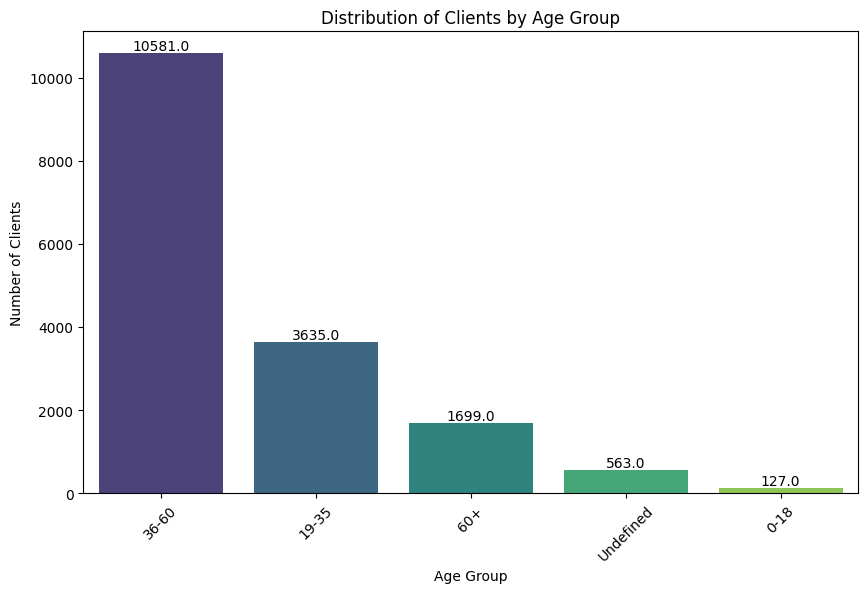

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Age Group Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=merged_data, x='age_group', order=merged_data['age_group'].value_counts().index, palette='viridis')

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Clients")
plt.title("Distribution of Clients by Age Group")
plt.xticks(rotation=45)

# Show count labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

# Show plot
plt.show()


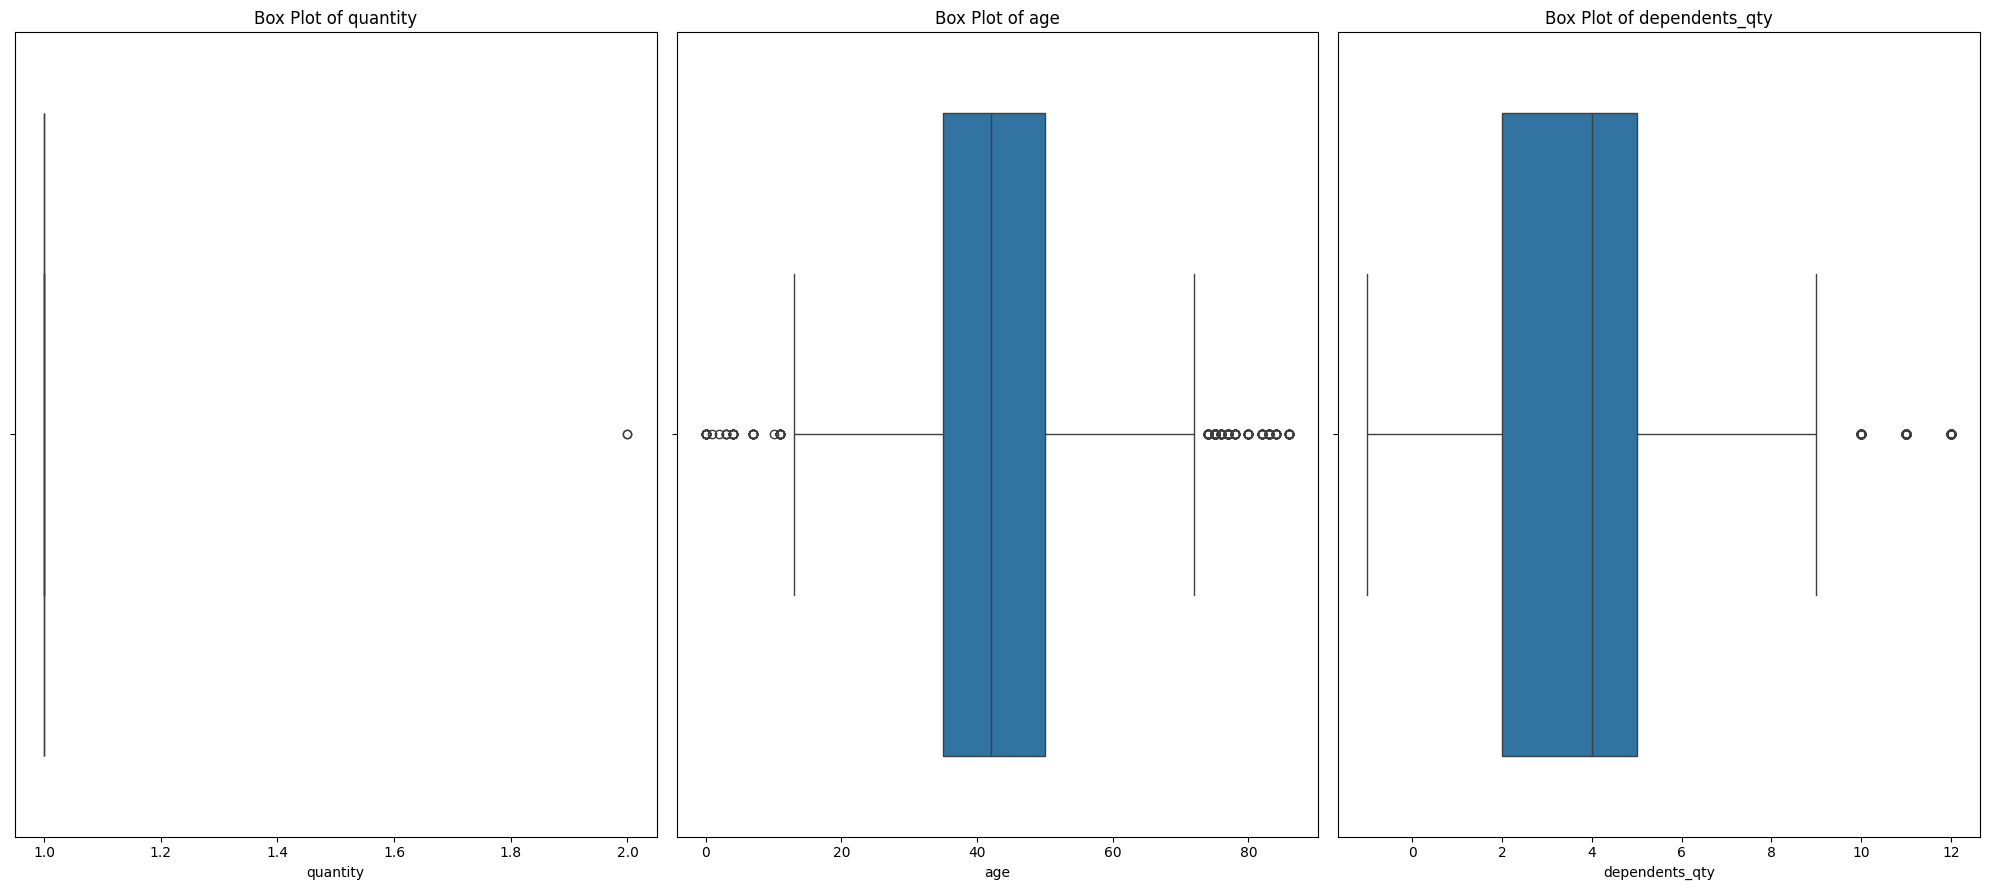

In [ ]:
# creating box plots to detect the outliers
columns = ['quantity', 'age', 'dependents_qty']
plt.figure(figsize=(20, 9))
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=processed_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()




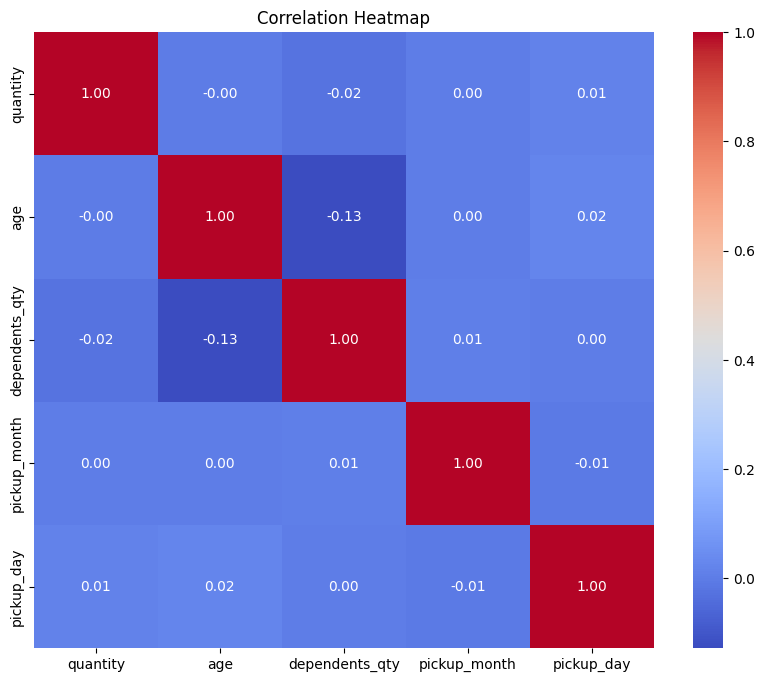

In [ ]:
# checking the correlation for numerical values
numerical_data = processed_data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


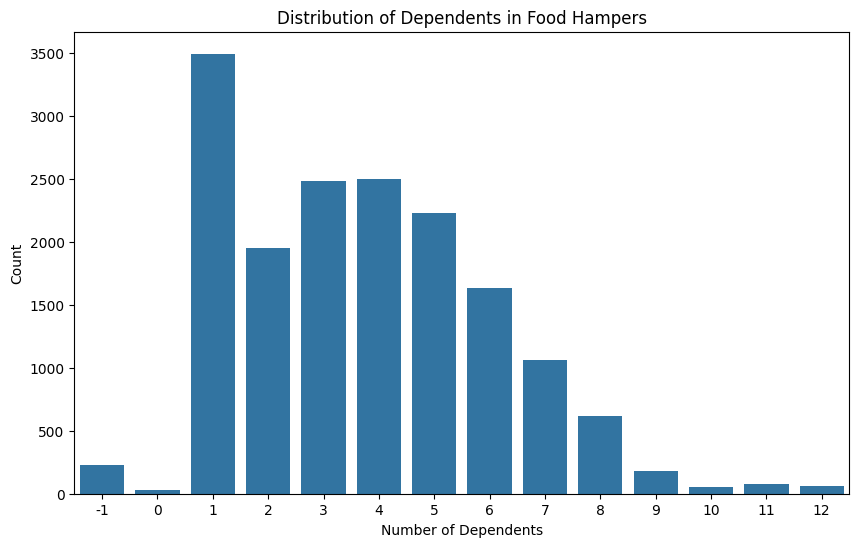

In [ ]:
#plOtting the bar graph to see the dependents for the families
plt.figure(figsize=(10, 6))
sns.countplot(data=processed_data, x='dependents_qty')
plt.title('Distribution of Dependents in Food Hampers')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()


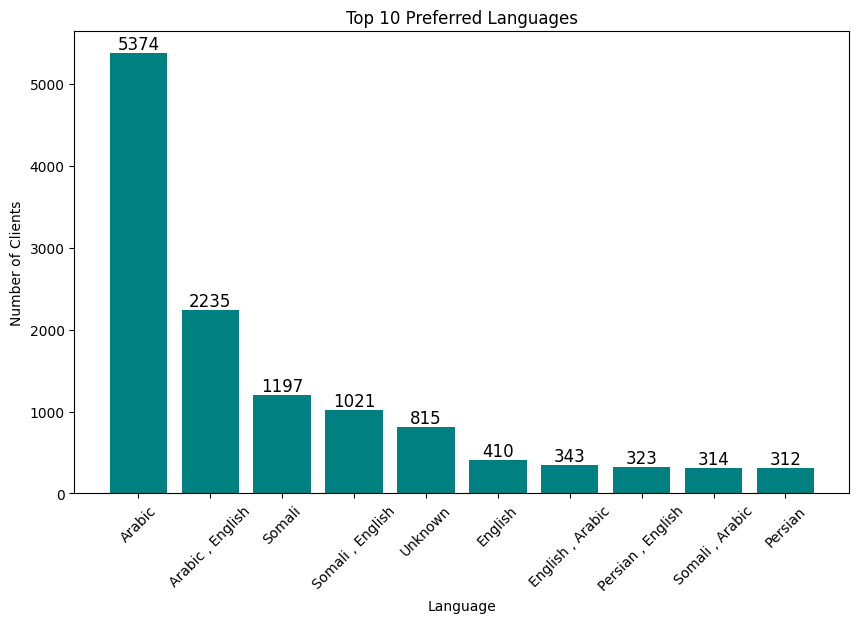

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 preferred languages and their counts
top_languages = processed_data['preferred_languages'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_languages.index, top_languages.values, color='teal')

# Add text labels for counts on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)

# Formatting the plot
plt.title('Top 10 Preferred Languages')
plt.xlabel('Language')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()


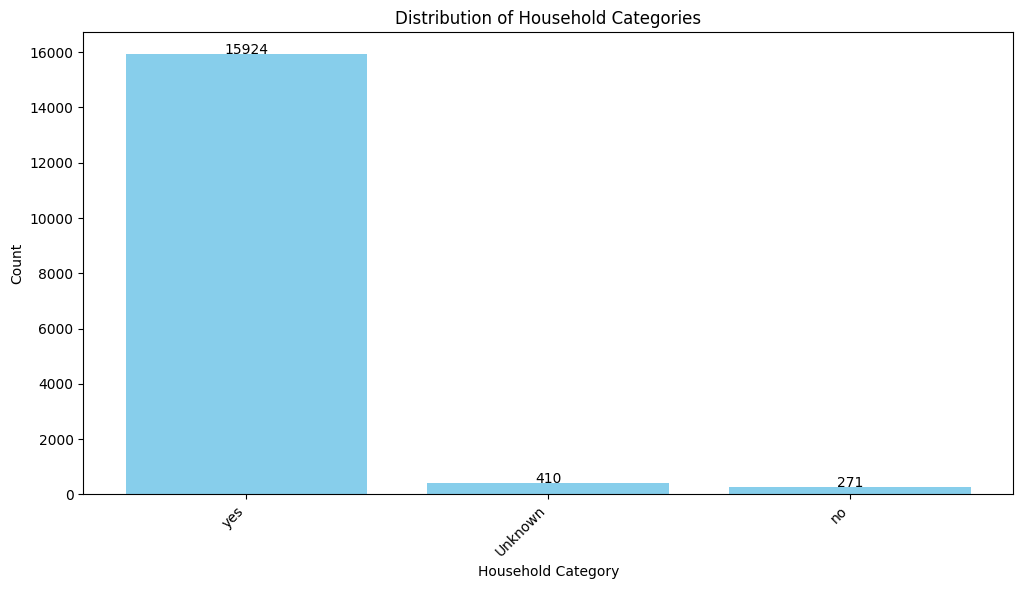

In [ ]:
import matplotlib.pyplot as plt

# Checking if 'household' column exists in processed_data
if 'household' in processed_data.columns:
    # Counting all household occurrences, including missing values
    household_detail = processed_data['household'].astype(str).value_counts(dropna=False).reset_index()
    household_detail.columns = ['household', 'count']

    # Plotting the household distribution
    plt.figure(figsize=(12,6))
    plt.bar(household_detail['household'], household_detail['count'], color='skyblue')
    plt.xlabel("Household Category")
    plt.ylabel("Count")
    plt.title("Distribution of Household Categories")
    plt.xticks(rotation=45, ha='right')

    # Adding count labels on bars
    for index, value in enumerate(household_detail['count']):
        plt.text(index, value + 5, str(value), ha='center', fontsize=10)

    plt.show()
else:
    print("Column 'household' does not exist in merged_data.")


In [ ]:
# print merged_data detail
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   agent_related           16605 non-null  object        
 1   collect_scheduled_date  16602 non-null  datetime64[ns]
 2   collect_token           16605 non-null  object        
 3   datetime_from           16605 non-null  object        
 4   pickup_location         16605 non-null  object        
 5   quantity                16605 non-null  int64         
 6   related_scheduler       16605 non-null  object        
 7   title                   16605 non-null  category      
 8   unique_client           16605 non-null  object        
 9   Creation Date_x         16605 non-null  datetime64[ns]
 10  Modified Date_x         16605 non-null  datetime64[ns]
 11  unique id               16605 non-null  object        
 12  address                 16605 non-null  object

In [ ]:
# Check missing values
print("Missing values count:")
print(processed_data.isnull().sum())


Missing values count:
agent_related               0
collect_scheduled_date      3
collect_token               0
datetime_from               0
pickup_location             0
quantity                    0
related_scheduler           0
title                       0
unique_client               0
Creation Date_x             0
Modified Date_x             0
unique id                   0
address                     0
age                         0
dependents_qty              0
external_id                 0
family                      0
household                   0
preferred_languages         0
primary_contact             0
Sex                         0
status                      0
Creation Date_y           119
Modified Date_y             0
age_group                   0
family_name                 0
pickup_month                0
pickup_day                  0
dtype: int64


In [ ]:
# Step 1: Check Min & Max Date
print("Min and Max collect_scheduled_date:")
print(processed_data['collect_scheduled_date'].min(), "to", processed_data['collect_scheduled_date'].max())

# Step 2: Convert to datetime if not already
processed_data['collect_scheduled_date'] = pd.to_datetime(processed_data['collect_scheduled_date'], errors='coerce')

# Step 3: Fill Missing Values
# Option 1: Fill using previous visit date for the same client
processed_data['collect_scheduled_date'] = processed_data.groupby('unique_client')['collect_scheduled_date'].transform(lambda x: x.fillna(method='ffill'))

# Option 2: Fill remaining missing values with the most common scheduled date
most_common_date = processed_data['collect_scheduled_date'].mode()[0]  # Find the most common date
processed_data['collect_scheduled_date'].fillna(most_common_date, inplace=True)

# Option 3: If still missing, use the median timestamp
median_date = processed_data['collect_scheduled_date'].dropna().median()
processed_data['collect_scheduled_date'].fillna(median_date, inplace=True)

# Step 4: Re-check for missing values
missing_values = processed_data['collect_scheduled_date'].isnull().sum()
print("Missing values in collect_scheduled_date:", missing_values)

# Step 5: Verify Min & Max Date Again
print("Updated Min and Max collect_scheduled_date:")
print(processed_data['collect_scheduled_date'].min(), "to", processed_data['collect_scheduled_date'].max())

Min and Max collect_scheduled_date:
2023-07-27 00:00:00 to 2025-09-06 03:00:00


<ipython-input-66-f12447658e77>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  processed_data['collect_scheduled_date'] = processed_data.groupby('unique_client')['collect_scheduled_date'].transform(lambda x: x.fillna(method='ffill'))


Missing values in collect_scheduled_date: 0
Updated Min and Max collect_scheduled_date:
2023-07-27 00:00:00 to 2025-09-06 03:00:00


<ipython-input-66-f12447658e77>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['collect_scheduled_date'].fillna(most_common_date, inplace=True)
<ipython-input-66-f12447658e77>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# Ensure 'collect_scheduled_date' is in datetime format
processed_data['collect_scheduled_date'] = pd.to_datetime(processed_data['collect_scheduled_date'], errors='coerce')

# Calculate days since last visit
today = pd.to_datetime("today")
processed_data['days_since_last_visit'] = (today - processed_data['collect_scheduled_date']).dt.days


In [ ]:
processed_data['visit_count'] = processed_data.groupby('unique_client')['unique_client'].transform('count')
print(processed_data['visit_count'].value_counts())

visit_count
15     2145
14     2128
13     2002
16     1792
17     1054
22      880
24      864
20      800
21      777
26      754
23      713
19      608
12      492
25      475
18      270
6       150
119     119
8        88
28       84
27       81
7        70
9        63
10       50
11       33
30       30
1        25
5        25
4        20
3         9
2         4
Name: count, dtype: int64


In [ ]:
# Create a new target variable: Has the client returned after their first visit?
processed_data['client_returned'] = processed_data['visit_count'] > 1

# Convert to binary (1 = returned, 0 = never returned)
processed_data['client_returned'] = processed_data['client_returned'].astype(int)

# Verify distribution
print("Unique values in client_returned:")
print(processed_data['client_returned'].value_counts())


Unique values in client_returned:
client_returned
1    16580
0       25
Name: count, dtype: int64


In [ ]:
# Define returning clients as those who visited within the last 1 year
processed_data['client_returned'] = (processed_data['days_since_last_visit'] < 365).astype(int)


In [ ]:
# print
print(processed_data['client_returned'].value_counts())

client_returned
1    13873
0     2732
Name: count, dtype: int64


In [ ]:
# Define today's date
today = pd.to_datetime("today")

# Define the cutoff date (one year ago)
one_year_ago = today - pd.Timedelta(days=365)

# Filter only visits in the last year
recent_visits = processed_data[processed_data['collect_scheduled_date'] >= one_year_ago]

# Count the number of visits per client in the last year
recent_visits_count = recent_visits.groupby('unique_client')['collect_scheduled_date'].count().reset_index()
recent_visits_count.columns = ['unique_client', 'visits_last_year']

# Merge back with the original dataset
processed_data = processed_data.merge(recent_visits_count, on='unique_client', how='left')

# Fill NaN with 0 (if a client has no visits in the last year, they get a 0)
processed_data['visits_last_year'].fillna(0, inplace=True)

# Convert to integer
processed_data['visits_last_year'] = processed_data['visits_last_year'].astype(int)

# Verify the results
print("🔹 Unique values in 'visits_last_year':")
print(processed_data['visits_last_year'].value_counts().sort_index())


🔹 Unique values in 'visits_last_year':
visits_last_year
0       19
1       12
2       14
3       18
4       30
5       40
6      186
7       72
8      102
9      572
10    1299
11    1821
12    2662
13    2340
14    1166
15     326
16     445
17    1013
18     505
19     709
20     777
21    1011
22     434
23      51
24      48
25     101
26     573
27      84
28      56
79     119
Name: count, dtype: int64


<ipython-input-72-6a7bac92e827>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['visits_last_year'].fillna(0, inplace=True)


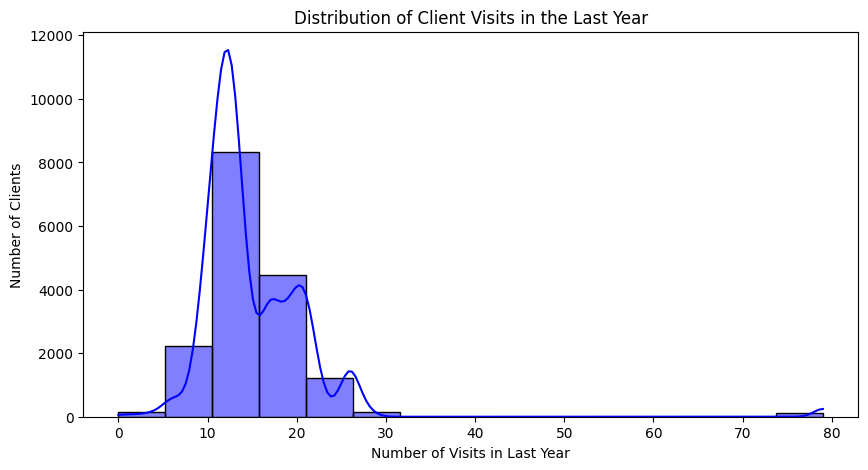

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(processed_data['visits_last_year'], bins=15, kde=True, color="blue")
plt.title("Distribution of Client Visits in the Last Year")
plt.xlabel("Number of Visits in Last Year")
plt.ylabel("Number of Clients")
plt.show()


🔹 Client Engagement Levels:
client_engagement
Frequent      16472
Occasional      102
Inactive         19
Rare             12
Name: count, dtype: int64


<ipython-input-74-48683c655693>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=processed_data['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")


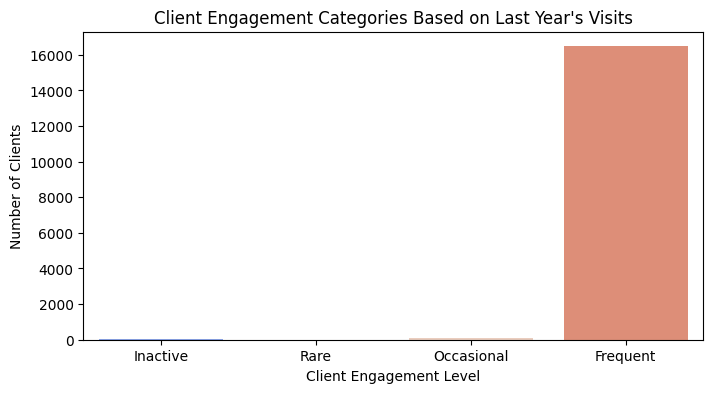

In [ ]:
# Define categories based on visit frequency
def categorize_client(visits):
    if visits == 0:
        return "Inactive"
    elif visits == 1:
        return "Rare"
    elif visits <= 5:
        return "Occasional"
    else:
        return "Frequent"

# Apply the function to create a new column
processed_data['client_engagement'] = processed_data['visits_last_year'].apply(categorize_client)

# Check the distribution
print("🔹 Client Engagement Levels:")
print(processed_data['client_engagement'].value_counts())

# Visualizing the engagement categories
plt.figure(figsize=(8,4))
sns.countplot(x=processed_data['client_engagement'], order=["Inactive", "Rare", "Occasional", "Frequent"], palette="coolwarm")
plt.title("Client Engagement Categories Based on Last Year's Visits")
plt.xlabel("Client Engagement Level")
plt.ylabel("Number of Clients")
plt.show()


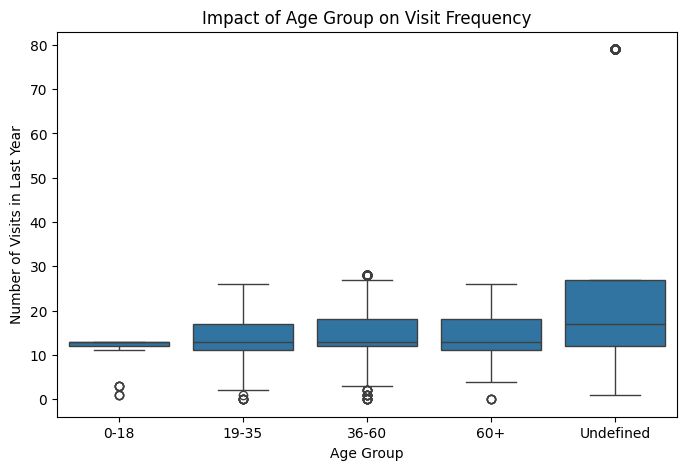

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=processed_data['age_group'], y=processed_data['visits_last_year'])
plt.title("Impact of Age Group on Visit Frequency")
plt.xlabel("Age Group")
plt.ylabel("Number of Visits in Last Year")
plt.show()


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Client_Geocode").getOrCreate()

# Load the processed dataset
df = spark.read.csv("processed_data.csv", header=True, inferSchema=True)

# Show dataset sample
df.show(5)


+--------------------+----------------------+-------------+-------------------+--------------------+--------+--------------------+--------------------+-------------+-------------------+-------------------+--------------------+-------+----+--------------+-----------+-------+---------+-------------------+---------------+---------+-------+---------------+---------------+---------+-----------+------------+----------+
|       agent_related|collect_scheduled_date|collect_token|      datetime_from|     pickup_location|quantity|   related_scheduler|               title|unique_client|    Creation Date_x|    Modified Date_x|           unique id|address| age|dependents_qty|external_id| family|household|preferred_languages|primary_contact|      Sex| status|Creation Date_y|Modified Date_y|age_group|family_name|pickup_month|pickup_day|
+--------------------+----------------------+-------------+-------------------+--------------------+--------+--------------------+--------------------+-------------+-

To see if the distance between their house and pickup location affects the retention we find distance with help of google maps and API key  

In [ ]:
import googlemaps
import pandas as pd
import time

# 🔹 Step 1: Load the dataset
df = pd.read_csv("processed_data_with_ordered_families.csv")

# 🔹 Step 2: Initialize Google Maps API
gmaps = googlemaps.Client(key="API_key")  # Replace with your valid API key

# 🔹 Step 3: Define function for geocoding a single address
def get_lat_lon(address):
    """Fetches latitude & longitude from Google Maps API"""
    try:
        if pd.isna(address) or address.strip().lower() in ["nan", "unknown", ""]:
            return None, None  # Return None for missing addresses

        geocode_result = gmaps.geocode(address)  # Google API call
        if geocode_result:
            location = geocode_result[0]["geometry"]["location"]
            return location["lat"], location["lng"]
    except Exception as e:
        print(f"⚠️ Error geocoding address '{address}': {e}")
        return None, None  # Return None if geocoding fails

# 🔹 Step 4: Apply geocoding with alignment
latitudes, longitudes = [], []

for i, address in enumerate(df["address"]):
    lat, lon = get_lat_lon(str(address))  # Ensure address is a string
    latitudes.append(lat)
    longitudes.append(lon)

    if i % 10 == 0:  # Add delay every 10 requests to prevent API rate limits
        time.sleep(1)

# 🔹 Step 5: Ensure correct alignment
if len(latitudes) == len(df) and len(longitudes) == len(df):
    df["latitude"] = latitudes
    df["longitude"] = longitudes
else:
    print(f"❌ Mismatch: latitudes={len(latitudes)}, longitudes={len(longitudes)}, rows={len(df)}")
    df["latitude"] = None  # Avoid incorrect alignment
    df["longitude"] = None

# 🔹 Step 6: Save the updated dataset
df.to_csv("processed_data_with_lat_lon.csv", index=False)

print("✅ Geocoding complete! Saved as 'processed_data_with_lat_lon.csv'")


<ipython-input-90-5b3d2aea7c79>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_data_with_ordered_families.csv")


✅ Geocoding complete! Saved as 'processed_data_with_lat_lon.csv'


In [ ]:
!pip install geopy==2.3.0

In [ ]:
import pandas as pd
from geopy.distance import geodesic

In [ ]:
df = pd.read_csv("processed_data_with_lat_lon.csv")  # Replace with the actual filename

<ipython-input-104-bb047b9f2769>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_data_with_lat_lon.csv")  # Replace with the actual filename


In [ ]:
import googlemaps
import pandas as pd
import time
target_address = "10545 108 St NW, Edmonton, AB T5H 2Z8"
location = geolocator.geocode(target_address)

# Initialize Google Maps API
gmaps = googlemaps.Client(key="API_key")  # Replace with your API key

# Get latitude & longitude
geocode_result = gmaps.geocode(target_address)

# Extract coordinates
if geocode_result:
    target_coords = (geocode_result[0]["geometry"]["location"]["lat"],
                     geocode_result[0]["geometry"]["location"]["lng"])
    print("✅ Target Coordinates:", target_coords)
else:
    print(f"⚠️ Address not found: {target_address}")


✅ Target Coordinates: (53.5486628, -113.5061058)


In [ ]:
from geopy.distance import geodesic

# Function to calculate distance
def calculate_distance(row):
    client_coords = (row['latitude'], row['longitude'])  # Client Address Coordinates
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])  # Pickup Location Coordinates

    # Ensure valid coordinates before calculating
    if None in client_coords or None in pickup_coords:
        return None  # Return None if any coordinate is missing

    return geodesic(client_coords, pickup_coords).kilometers  # Distance in km


In [ ]:
# Ensure pickup location coordinates exist
pickup_lat = 53.5486628  # Example: Edmonton Pickup Latitude (Replace with actual)
pickup_lon = -113.5061058  # Example: Edmonton Pickup Longitude (Replace with actual)

# Add Pickup Coordinates to Dataset
df['pickup_latitude'] = pickup_lat
df['pickup_longitude'] = pickup_lon

# Before applying distance calculation, filter out rows with NaN coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Apply Distance Calculation
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Show Sample Data
print(df[['address', 'latitude', 'longitude', 'distance_km']].head())

                                              address   latitude   longitude  \
13      10545 108 St NW, Edmonton, AB T5H 2Z8, Canada  53.548663 -113.506106   
19       14604 77 St NW, Edmonton, AB T5C 1E8, Canada  53.608420 -113.460920   
20       14604 77 St NW, Edmonton, AB T5C 1E8, Canada  53.608420 -113.460920   
21       14604 77 St NW, Edmonton, AB T5C 1E8, Canada  53.608420 -113.460920   
23  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada  53.411350 -113.524156   

    distance_km  
13     0.000000  
19     7.293171  
20     7.293171  
21     7.293171  
23    15.329190  


In [ ]:
df.to_csv("processed_data_with_distances.csv", index=False)
print("✅ Distance calculation complete! Saved as 'processed_data_with_distances.csv'.")


✅ Distance calculation complete! Saved as 'processed_data_with_distances.csv'.


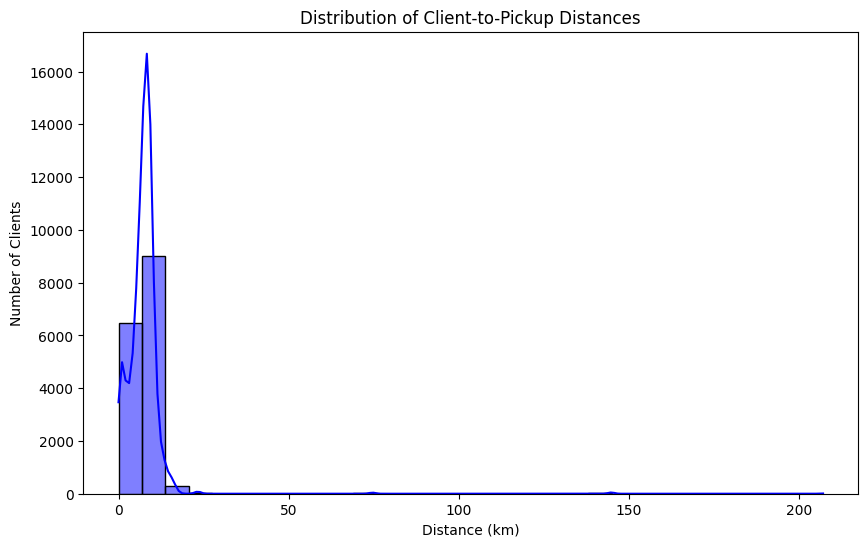

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['distance_km'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Client-to-Pickup Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Clients")
plt.show()


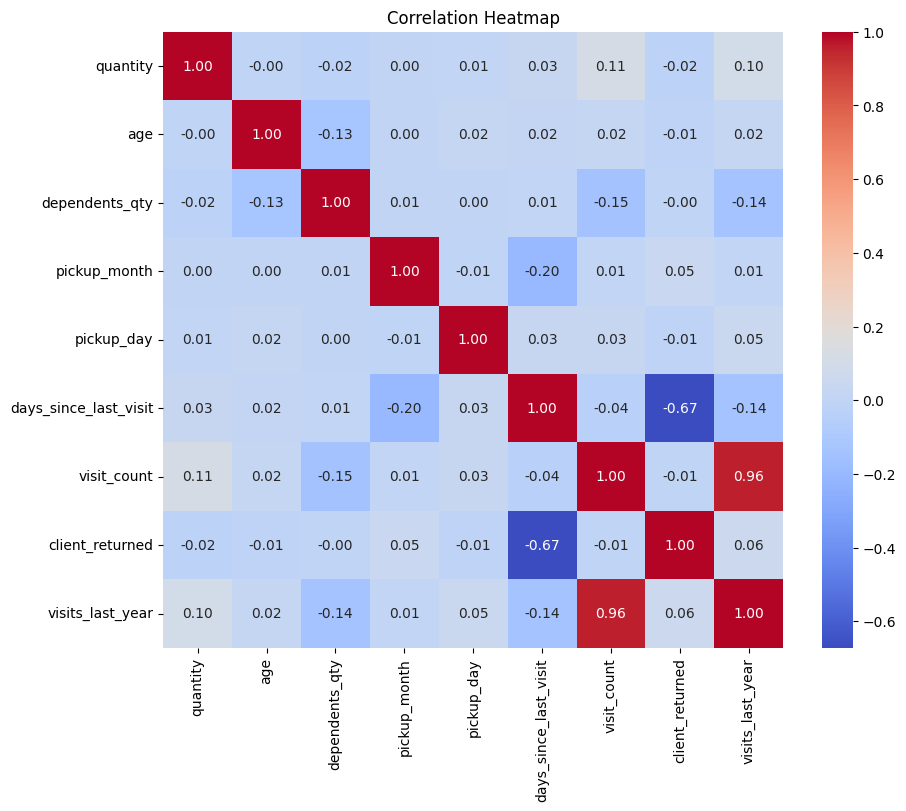

In [ ]:
# checking the correlation for numerical values
numerical_data = processed_data.select_dtypes(include=['int64', 'float64'])

# Drop unwanted columns
columns_to_drop = ['pickup_lat', 'pickup_lon', 'home_lat', 'home_lon']
numerical_data = numerical_data.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' to avoid errors if columns don't exist

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()